# Decision Tree Notebook


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\aryan\Desktop\XAI\XAI_Models\binary\accident\accident.csv')

# Display the first few rows of the dataframe
print(df.head())
df.head(5)

   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


              Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  \
count   200.00000     199       197.000000         200           200   
unique        NaN       2              NaN           2             2   
top           NaN  Female              NaN         Yes           Yes   
freq          NaN     110              NaN         111           111   
mean     43.42500     NaN        70.441624         NaN           NaN   
std      14.94191     NaN        30.125298         NaN           NaN   
min      18.00000     NaN        20.000000         NaN           NaN   
25%      31.00000     NaN        43.000000         NaN           NaN   
50%      43.50000     NaN        71.000000         NaN           NaN   
75%      56.00000     NaN        95.000000         NaN           NaN   
max      69.00000     NaN       119.000000         NaN           NaN   

         Survived  
count   200.00000  
unique        NaN  
top           NaN  
freq          NaN  
mean      0.50500  
std       0.501

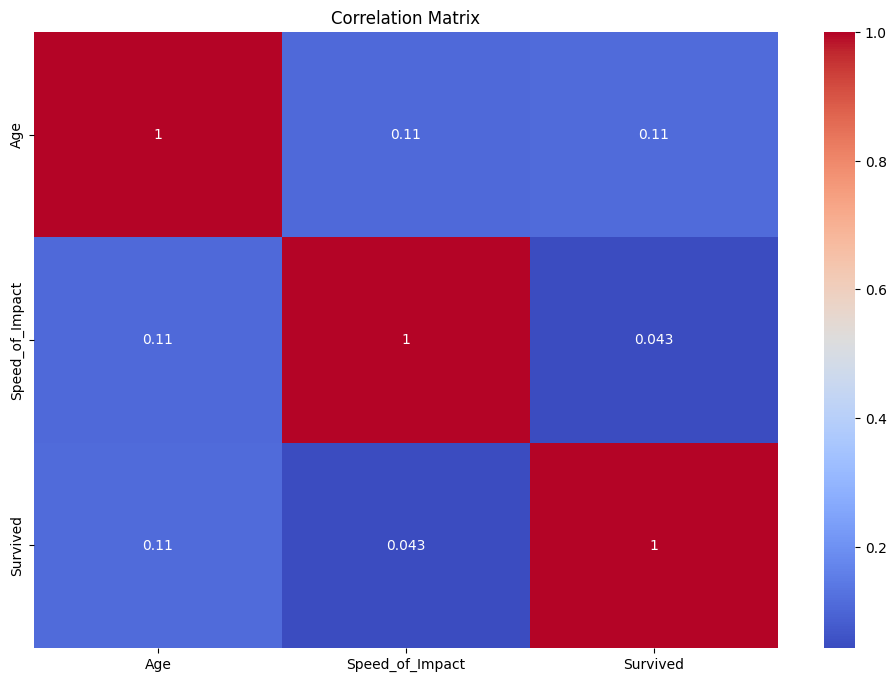

In [3]:
# Display basic statistics
print(df.describe(include='all'))

# Correlation matrix for numerical columns only
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

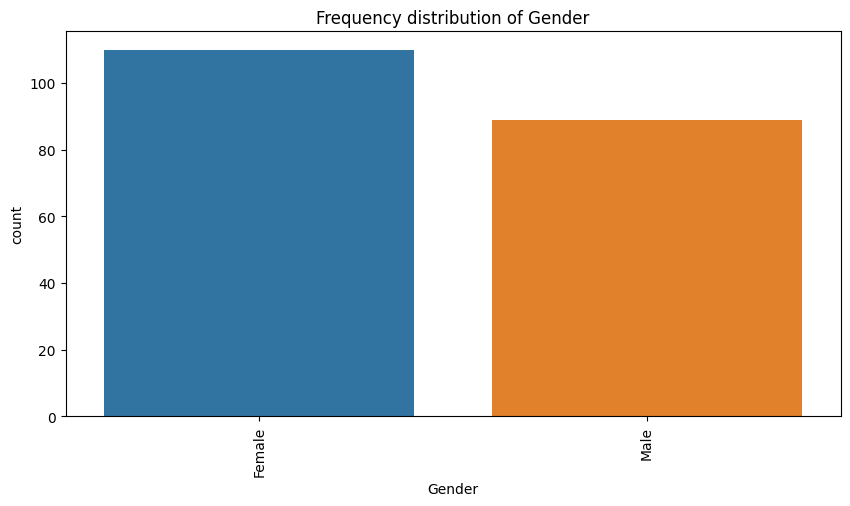

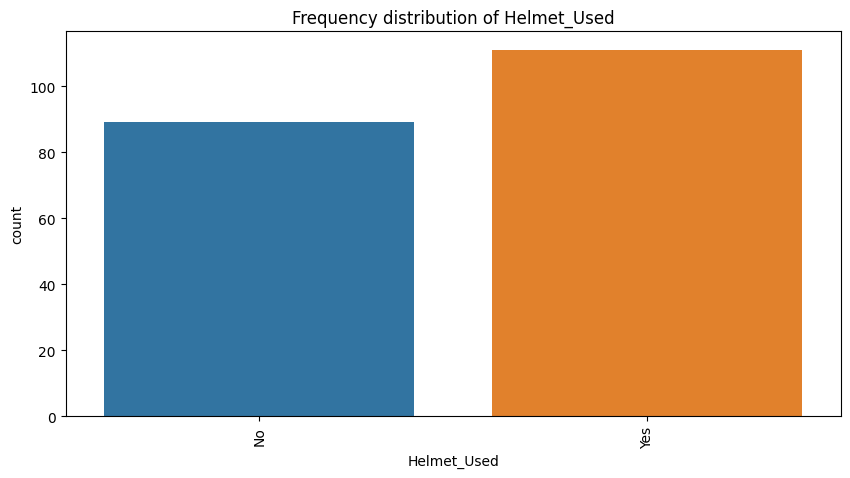

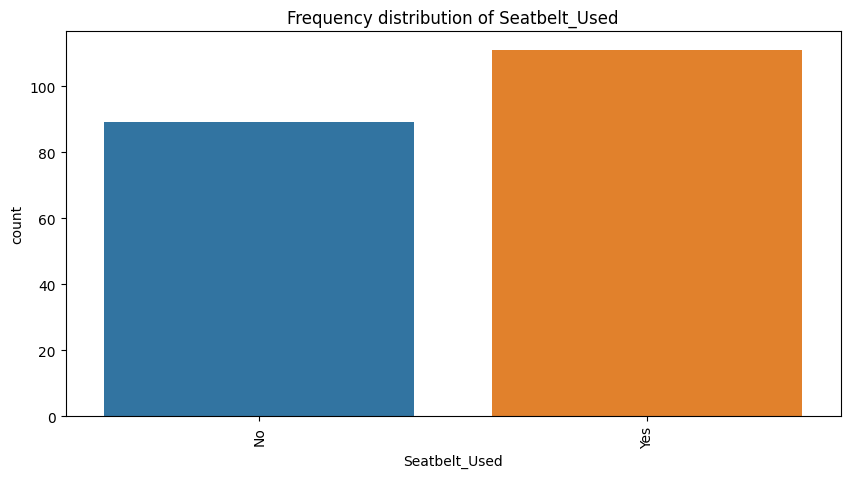

In [4]:
# Frequency distributions for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Frequency distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [6]:

# Define the target and features
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
